https://csinva.io/blog/misc/imagenet_quickstart/readme

https://github.com/pytorch/vision/blob/d2c763e14efe57e4bf3ebf916ec243ce8ce3315c/torchvision/datasets/folder.py#L93-L94

https://observablehq.com/@mbostock/imagenet-hierarchy

https://github.com/Evolving-AI-Lab/ppgn/tree/master/misc

In [1]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset, TensorDataset, DataLoader
import torch.utils.data as data_utils
import torchvision
from torchvision import transforms
from torchvision import datasets
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
root =     '/home/DATA/ITWM/ImageNetHierarchy'
val_root = '/home/DATA/ITWM/ImageNetHierarchy/val'

In [3]:
map_clsloc_path = "/home/DATA/ITWM/ImageNet/ILSVRC2012_devkit_t12/data/map_clsloc.txt"

In [4]:
# trainset = datasets.ImageNet(
#     os.path.join(root, 'train'), split='train',
#     transform=self.train_transforms, 
#     target_transform=None, download=False)

In [5]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
val_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    normalize,
])

In [6]:
# valset = datasets.ImageNet( 
#     os.path.join(root, 'val'), split='val', 
#     transform=val_transforms, 
#     target_transform=None)

In [80]:
class ImageNetDataSet(torchvision.datasets.ImageFolder):
    def __init__(self, img_path, transform=None):
        super(ImageNetDataSet, self).__init__(img_path, transform)
        
        self._read_labels()
        self.samples = self._make_dataset(self.samples)
        # self.classes, self.class_to_idx = self._my_classes()
        # self.imgs = self.samples
        self.targets = [s[1] for s in self.samples]

    def _read_labels(self):
        map_clsloc_path = "/home/DATA/ITWM/ImageNet/ILSVRC2012_devkit_t12/data/map_clsloc.txt"
        dir_class_map = {}
        class_dir_map = {}
        id_class_map  = {}

        with open(map_clsloc_path, "rb") as map_class_file:
            rows = map_class_file.readlines()
            for row in rows:
                row = row.strip()
                arr = row.decode("utf-8").split(" ")
                class_dir_map[arr[0]] = arr[2]
                id_class_map[int(arr[1])] = arr[2]
                dir_class_map[arr[0]] = int(arr[1])
        
        self.class_dir_map = class_dir_map
        self.id_class_map  = id_class_map
        
        with open('/home/DATA/ITWM/ImageNet/ILSVRC2012_devkit_t12/data/imagenet1000_clsidx_to_labels.txt') as f:
            data = f.read()
        import ast
        d = ast.literal_eval(data)
        
        key_list = list(d.keys())
        val_list = list(d.values())
        
        for key, value in class_dir_class_id.items():
            for val in val_list:
                val_split = val.split(", ")
                val_split[0] = val_split[0].replace(" ", "_")
                if value in val_split:
                    print( key,  key_list[ val_list.index(val) ], val )

                    class_dir_class_id[key] = key_list[ val_list.index(val) ]


        self.dir_class_map = class_dir_class_id
        
        
    def _my_classes(self):
        self.dir_class_map 
        class_to_idx = {classes[i]: i for i in range(len(classes))}

        return classes, class_to_idx

    
    def _make_dataset(self, samples):
        n = len(samples)
        ds = [None] * n
        print("dfasfa")
        for i, (img, cls) in enumerate(samples):            
            ds[i] = (img, self._custom_class(cls))

        return ds
    
    
    def _custom_class(self, cls):
        return self.dir_class_map[self.classes[cls]]

    
    def pil_loader(self, path):
        # open path as file to avoid ResourceWarning (https://github.com/python-pillow/Pillow/issues/835)
        with open(path, 'rb') as f:
            img = Image.open(f)
            return img.convert('RGB')
    

    def __getitem__(self, index):
        """
        Args:
            index (int): Index
        Returns:
            tuple: (sample, target) where target is class_index of the target class.
        """
        path, target = self.samples[index]
        sample = self.pil_loader(path)
        if self.transform is not None:
            sample = self.transform(sample)
        if self.target_transform is not None:
            target = self.target_transform(target)

        return sample, target

In [81]:
transform = transforms.Compose([
    # you can add other transformations in this list
    transforms.ToTensor()
])

In [82]:
dataset = ImageNetDataSet(val_root, val_transforms)
# dataset.samples

dfasfa


In [84]:
# dataset.dir_class_map

In [42]:
len(dataset)

2550

In [85]:
dataloader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=2)

In [86]:
data_iter = iter(dataloader)


In [87]:
images, labels = data_iter.next()
images.shape

torch.Size([1, 3, 224, 224])

In [88]:
labels

tensor([755])

In [89]:
image = images.numpy()[0].transpose((1,2,0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


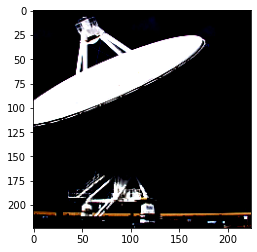

In [90]:
plt.figure()
plt.imshow(image)

In [91]:
import torchvision.models as models
model = models.wide_resnet50_2(pretrained=True)

In [92]:
class_dir_class_id = dataset.class_dir_map

In [54]:
with open('imagenet1000_clsidx_to_labels.txt') as f:
    data = f.read()
import ast
d = ast.literal_eval(data)

In [55]:
key_list = list(d.keys())
val_list = list(d.values())

In [56]:
position = val_list.index("hammerhead, hammerhead shark")

In [57]:
print(key_list[position])

4


In [67]:
val = val_list[1].split(", ")
val

['goldfish', 'Carassius auratus']

In [74]:
val[0].replace(" ", "_")

'goldfish'

In [65]:
if 'ten' in val:
    print(val)

In [93]:
# for key, value in class_dir_class_id.items():
#     for val in val_list:
#         val_split = val.split(", ")
#         val_split[0] = val_split[0].replace(" ", "_")
#         if value in val_split:
#             print( key,  key_list[ val_list.index(val) ], val )
            
#             class_dir_class_id[key] = key_list[ val_list.index(val) ]